In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='furnishingstatus', ylabel='count'>

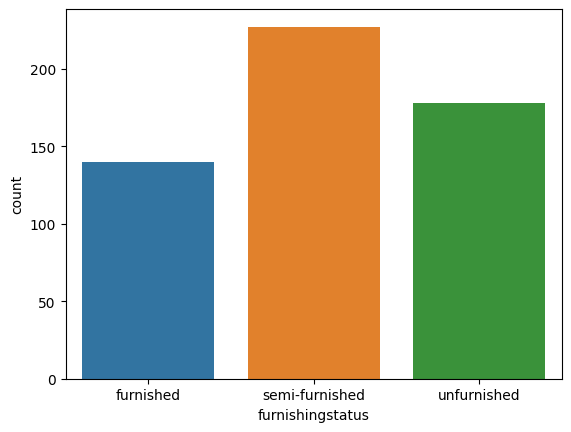

In [ ]:
sns.countplot(x=df['furnishingstatus'])

In [ ]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True)

In [ ]:
X=df.drop('price',axis=1)
Y=df['price']

In [ ]:
 df['area_per_room']=df['area']/df['bedrooms']

In [ ]:
df['area_per_bathroom']=df['area']/df['bathrooms']

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_per_room,area_per_bathroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,3710.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,2240.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,4980.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,3750.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,7420.0


In [ ]:
#def normalize(x):
 # return (x-np.mean(x))/np.std(x)
#manual scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_per_room,area_per_bathroom
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-0.844888,-0.696429,0.041926,-0.307059
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-0.844888,-0.696429,0.501177,-1.000323
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,1.183588,-0.696429,1.789465,0.291884
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-0.844888,-0.696429,0.065783,-0.288194
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-0.844888,-0.696429,0.041926,1.442608


In [ ]:
X=df.drop('price',axis=1)
y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm=sm.add_constant(X_train)

In [ ]:
model=sm.OLS(Y_train,X_train_sm)
lm1=model.fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     54.86
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           8.36e-84
Time:                        14:26:34   Log-Likelihood:                -5832.3
No. Observations:                 381   AIC:                         1.170e+04
Df Residuals:                     365   BIC:                         1.176e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
rfe=RFE(lm,n_features_to_select=12)

In [ ]:
rfe=rfe.fit(X_train,Y_train)

In [ ]:

print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True False  True  True  True  True  True False
  True  True  True]
[1 3 1 1 1 2 1 1 1 1 1 4 1 1 1]


In [ ]:
tmp=X_train.columns[rfe.support_==False]
tmp

Index(['bedrooms', 'guestroom', 'furnishingstatus_semi-furnished'], dtype='object')

In [ ]:
X_train=X_train.drop(tmp,axis=1)

In [ ]:
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lm.score(X_train,Y_train)

0.6918525204908169

In [ ]:
X_test=X_test.drop(tmp,axis=1)

In [ ]:
X_test.shape

(164, 12)

In [ ]:
lm.score(X_test,Y_test)

0.6359661839508426